<a href="https://colab.research.google.com/github/GRACENGARI/DEEP-LEARNING-PROJECT/blob/main/CNN_CLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,Y_train),(X_test,Y_test)=cifar10.load_data()

DISPLAY THE IMAGE AND LABELS

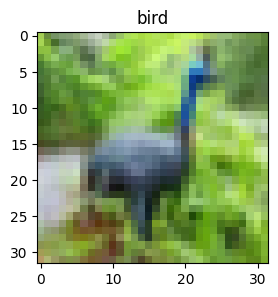

In [11]:
from operator import index
class_labels = ["airplane","automobile","bird","cat","dog","frog","horse","ship","truck"]
index =6
plt.figure(figsize=(3,3))
plt.imshow(X_train[index])
plt.title(class_labels[Y_train[index][0]])
plt.show()

IMAGE PREPROCESSING
normalizing

In [14]:
X_train = X_train/255
X_test = X_test/255

0 Airplane
1:Automobile
2:BIRD
AIRPLANE[1,00000]
AUTOMOBILE[0,IIII]
BIRD[0,0,1,000]
ONEHOTENCODING

In [15]:
Y_train_en = to_categorical(Y_train,10)
Y_test_en = to_categorical(Y_test,10)


In [16]:
Y_test_en

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

CNN implementation

In [17]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten
model.add(Flatten())
model.add(Dense(128,activation="relu"))
#output layer
model.add(Dense(10,activation="softmax"))
#compile
model.compile(loss ="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
model.fit(X_train,Y_train_en,epochs=20,verbose=1,validation_data=(X_test,Y_test_en))

Epoch 1/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5027 - accuracy: 0.4592 - val_loss: 1.2965 - val_accuracy: 0.5351
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1904 - accuracy: 0.5800 - val_loss: 1.1390 - val_accuracy: 0.5987
Epoch 3/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0703 - accuracy: 0.6257 - val_loss: 1.0853 - val_accuracy: 0.6207
Epoch 4/20
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9797 - accuracy: 0.6570 - val_loss: 1.0393 - val_accuracy: 0.6323
Epoch 5/20
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9143 - accuracy: 0.6790 - val_loss: 0.9600 - val_accuracy: 0.6662
Epoch 6/20
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8544 - accuracy: 0.6997 - val_loss: 0.9721 - val_accuracy: 0.6579
Epoch 7/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7984 - accuracy: 0.7209 - val_loss: 0.9452 -

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1